In [ ]:
import glob
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.models import Sequential
from keras.datasets import cifar10 #tensorflow for neural network stuff

from tensorflow.keras import layers, models
from sklearn.preprocessing import LabelBinarizer

from skimage.transform import resize

import matplotlib.pyplot as plt
import csv

import random

In [ ]:
#Parameter

#Speicherort der Test-Daten for example './GTSRB/Training'
TRAINING_DATA_PATH = "Z:/Daten/Universität/DSKI_Projektarbeit/DATA_DSKI_Projekt/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images"
TEST_DATA_PATH = "Z:/Daten/Universität/DSKI_Projektarbeit/DATA_DSKI_Projekt/GTSRB_Online-Test-Images/GTSRB/Online-Test/Images"

In [28]:
# function for reading the images
# arguments: path to the traffic sign data, for example './GTSRB/Training'
# returns: list of images, list of corresponding labels 
def readTrafficSigns(rootpath):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.

    Arguments: path to the traffic sign data, for example './GTSRB/Training'
    Returns:   list of images, list of corresponding labels'''
    images = [] # images
    labels = [] # corresponding labels
    # loop over all 42 classes
    for c in range(0,43):
        prefix = rootpath + '/' + format(c, '05d') + '/' # subdirectory for class
        gtFile = open(prefix + 'GT-'+ format(c, '05d') + '.csv') # annotations file
        gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
        next(gtReader) # skip header
        # loop over all images in current annotations file
        for row in gtReader:
            images.append(plt.imread(prefix + row[0])) # the 1th column is the filename
            labels.append(row[7]) # the 8th column is the label
        gtFile.close()
    return images, labels

def rezizeImg(imgs_lst):
    new_size = (32, 32)
    resized_images = []
    for img in imgs_lst:
        resized_img = resize(img, new_size, anti_aliasing=True)
        resized_images.append(resized_img)

    return np.array(resized_images)

In [30]:
# Trainings und Testdaten vorbereiten
trainImages, trainImages =  readTrafficSigns(TRAINING_DATA_PATH)

# Train-Test-Aufteilung
X_train, X_test, y_train, y_test = train_test_split( np.array(trainImages),  np.array(trainImages), test_size=0.2, random_state=42)
# One-Hot-Encoding der Labels
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [33]:
# Annahme: X_train enthält deine Bilder
new_size = (32, 32)
resized_images = []
for img in X_train:
    resized_img = resize(img, new_size, anti_aliasing=True)
    resized_images.append(resized_img)

X_train = np.array(resized_images)

ValueError: Cannot convert from <U2 to float64.

In [31]:
X_train = rezizeImg(X_train)
X_test = rezizeImg(X_test)

ValueError: Cannot convert from <U2 to float64.

In [21]:
X_train = X_train.astype('float32') / 255 #Die Zeile X_train = X_train.astype('float32') / 255 normalisiert die Pixelwerte der Bilder auf den Bereich von 0 bis 1. Dies ist wichtig, damit das Modell effizient trainiert werden kann.

# One-Hot-Encoding der Labels
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
#Die Zeilen mit dem One-Hot-Encoding (lb = LabelBinarizer() und y_train = lb.fit_transform(y_train)) sind notwendig, um die Labels in ein Format umzuwandeln, das für das neuronale Netzwerk geeignet ist. Jede Klasse (Verkehrszeichen) wird dabei als Vektor dargestellt, wobei nur das entsprechende Element auf 1 gesetzt ist.


In [ ]:
# Preprocessing: Konvertiere Bilder in Schwarz-Weiß und normalisiere die Pixelwerte
#X_train = X_train.reshape((-1, 32, 32, 1))
X_train = X_train.astype('float32') / 255

# One-Hot-Encoding der Labels
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)

In [22]:
# Modellarchitektur
# Definiere das Modell
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(43, activation='softmax'))  # 43 Klassen für Verkehrszeichen

# Kompiliere das Modell
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

c:\Users\felix\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.fit(X_train, y_train, epochs=10, batch_size=32) #, validation_data=(X_test, y_test)

Epoch 1/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.2039 - loss: 2.7260
Epoch 2/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.3994 - loss: 1.8660
Epoch 3/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.4906 - loss: 1.5896
Epoch 4/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.5212 - loss: 1.4033
Epoch 5/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 0.5714 - loss: 1.2499
Epoch 6/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.6217 - loss: 1.1318
Epoch 7/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.6412 - loss: 1.0458
Epoch 8/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.6715 - loss: 0.9703
Epoch 9/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.6917 - loss: 0.8964
Epoch 10/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.7235 - loss: 0.8385


TypeError: Image data of dtype <U1 cannot be converted to float

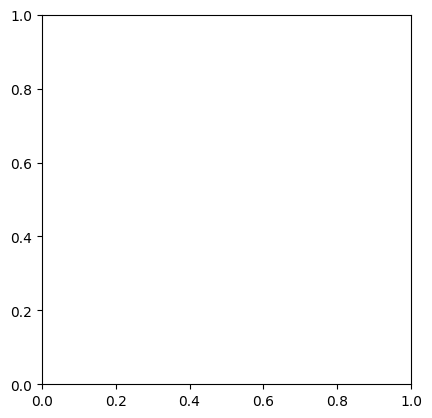

In [32]:
#Testen des Modells:
    
# Wähle ein zufälliges Bild aus dem Testdatensatz
random_index = np.random.randint(0, len(X_test))
test_image = X_train[random_index]
true_label = y_train[random_index]

# Zeige das Bild an
plt.imshow(test_image.squeeze(), cmap='gray')
plt.title(f"Zufälliges Testbild (Klasse {np.argmax(true_label)})")
plt.axis('off')
plt.show()

# Klassifiziere das Bild mit dem trainierten Modell
predicted_probs = model.predict(np.expand_dims(test_image, axis=0))
predicted_class = np.argmax(predicted_probs)

# Gib die Klassifizierung und die Wahrscheinlichkeit aus
print(f"Vorhergesagte Klasse: {predicted_class}")
print(f"Wahrscheinlichkeit: {predicted_probs[0][predicted_class]:.2f}")